## Solución numérica de Ecuaciones Diferenciales Ordinarias de segundo orden

### Problemas con condiciones iniciales: Runge-Kutta
$$ \newcommand{\pap}[1]{\left( #1 \right)}
\newcommand{\pas}[1]{\left[ #1 \right]}
\newcommand{\pac}[1]{\left\{ #1 \right\}}
\newcommand{\pav}[1]{\left\vert #1 \right\vert}
\newcommand{\paV}[1]{\left\Vert #1 \right\Vert}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\zzb}{\mathbf{z}}
\newcommand{\Am}{\mathbb{A}}
$$
Supongamos que se tiene una ecuación diferencial ordinaria de segundo orden que se puede expresar de la forma:
$$
\begin{equation}
y''(x)=F \pap{x,y(x),y'(x)}\, .
\tag{1}
\end{equation}
$$
Y que además este probleme define unas condiciones iniciales en un punto $x_0$: $y(x_0)=y_0$ y $y'(x_0)=y'_0$. La solución de este tipo de problemas se puede ver como una ecuación diferencial ordinaria **_de primer orden, pero vectorial_**. Es decir, una ecuación de la forma:
$$
\begin{equation}
\vec{y}'(x)=\vec{F}\left(x,\vec{y}\right)\, ,
\tag{2}
\end{equation}
$$
donde $\vec{y}$ puede ser un vector de las dimensiones que se desee. En nuestro caso particular, $\vec{y}$ tiene dos dimensiones y se puede ver como $\vec{y}=\left\{y_1,y_2 \right\}=\left\{y(x),y'(x)\right\}$. Notemos entonces que,
$$
\begin{equation}
\vec{y}'(x)=\left\{y_1'(x),y_2'(x)\right\}=\left\{y'(x),y''(x)\right\}=\left\{y_2,F(x,y_1,y_2)\right\}\, .
\tag{3}
\end{equation}
$$
Una vez notado ese cambio de enfoque, se puede usar cualquier método de solución de ecuaciones de primer orden que se desee. En particular, los métodos Runge-Kutta (en especial el **RK4**) son bastante sencillos de implementar y suelen comportarse muy bien en la mayoria de los casos en términos de eficiencia y convergencia. Este método se basa en que si se conoce el valor de $x$ y $\vec{y}(x)$, el valor de $\vec{y}(x+\Delta x)$ se puede aproximar como:
$$
\begin{align}
\vec{y}(x+\Delta x) \approx & \, \vec{y}(x)+\left(\vec{k}_1+2\vec{k}_2+2\vec{k}_3+\vec{k}_4 \right)/6 \, : \tag{4} \\
\vec{k_1}= & \, \Delta x \, \vec{F}   \left(x,\vec{y}(x)\right) \, , \\
\vec{k_2}= & \, \Delta x  \, \vec{F}  \left(x+\frac{\Delta x}{2},\vec{k}_1\right) \, , \\
\vec{k_3}= & \, \Delta x  \, \vec{F} \left(x+\frac{\Delta x}{2},\vec{k}_2\right) \, , \\
\vec{k_4}= & \, \Delta x  \, \vec{F} \left(x+\Delta x,\vec{k}_3\right) \, .
\end{align}
$$

En el siguiente ejemplo de código en **Python** empleamos el método **RG4** para resolver **_ecuaciones de Bessel_**, que son de la forma:
$$
\begin{equation}
y''(x)=-\frac{1}{x}y'(x)+\left(\frac{n^2}{x^2}-1 \right)y(x) \, .
\tag{5}
\end{equation}
$$
En particular, resolvemos la ec. de Bessel para $n=0,1,2$ desde el punto inicial $x_0=2$ con las condiciones iniciales $y(x_0)=0.6$ y $y'(x_0)=0$.

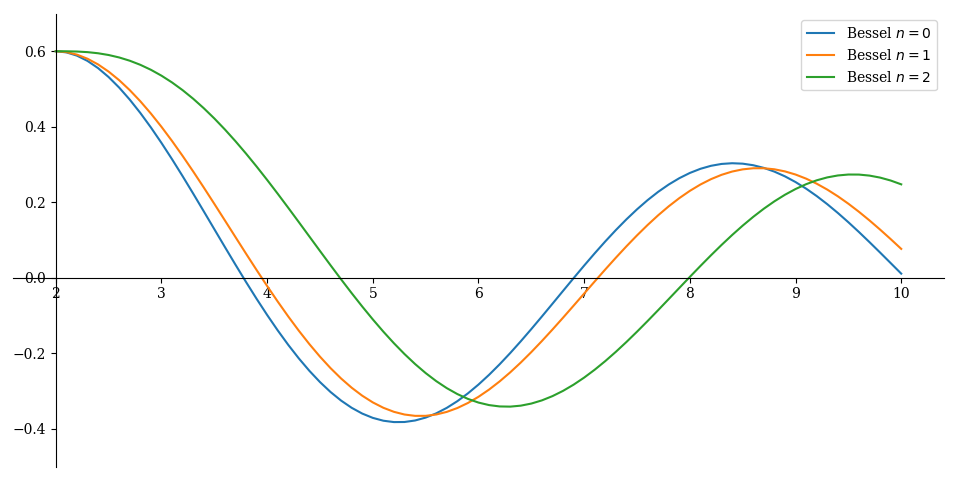

In [61]:
#Importamos algunas librerías
import matplotlib.pyplot as plt
import numpy as nmp
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']

# Definimos la ecuación diferencial que queremos resolver, en este caso es la ecuación de Bessel
FF= lambda nn,x,y,yp:-(1/x)*yp+((nn/x)**2-1)*y


# Definimos el siguiente paso por método de Runge-Kutta
def nexty(x,yvec,dx,der):
    k1=dx*der(x,yvec)
    k2=dx*der(x+dx/2,yvec+k1/2)
    k3=dx*der(x+dx/2,yvec+k2/2)
    k4=dx*der(x+dx,yvec+k3)
    yvecn=yvec+(k1+2*k2+2*k3+k4)/6
    xn=x+dx
    return xn,yvecn

# Hallamos el conjunto de valores xsol, ysol de la ecuación diferencial
def ODEsolve(x0,vec0,nsteps,dx,der,nmod=1):
# x0, vec0: el punto inicial y las condiciones iniciales
# nsteps: el número de pasos que se dan
# dx: el tamaño del paso
# der: la función de derivada
# nmod: por si en el output se quiere dividir el número de puntos en nmod
    x=x0
    yvec=nmp.array(vec0)
    xsol=nmp.array([x0])
    ysol=nmp.array([yvec[0]])
    for ii in range(nsteps):
        x,yvec =nexty(x,yvec,dx,der)
        if ((ii+1)%nmod==0):
            xsol=nmp.append(xsol,x)
            ysol=nmp.append(ysol,yvec[0])
# el output son los arreglos de puntos (x,y)        
    return xsol,ysol

# Transformamos la derivada a forma vectorial, definimos n=0 en la ec. de Bessel
dery= lambda x,yvec: nmp.array([yvec[1],FF(0,x,yvec[0],yvec[1])])
#Hallamos la solución de la ecuación n=0
xsol,ysol0=ODEsolve(2,[0.6,0],8000,0.001,dery,100)
# Transformamos la derivada a forma vectorial, definimos n=1 en la ec. de Bessel
dery= lambda x,yvec: nmp.array([yvec[1],FF(1,x,yvec[0],yvec[1])])
#Hallamos la solución de la ecuación n=1
xsol,ysol1=ODEsolve(2,[0.6,0],8000,0.001,dery,100)
# Transformamos la derivada a forma vectorial, definimos n=2 en la ec. de Bessel
dery= lambda x,yvec: nmp.array([yvec[1],FF(2,x,yvec[0],yvec[1])])
#Hallamos la solución de la ecuación n=2
xsol,ysol2=ODEsolve(2,[0.6,0],8000,0.001,dery,100)

# Graficamos las soluciones
plt.figure(figsize=(12,6),dpi=100)
plt.plot(xsol,ysol0)
plt.plot(xsol,ysol1)
plt.plot(xsol,ysol2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',2))
plt.ylim(-0.5,0.7)
plt.legend(['Bessel $n=0$','Bessel $n=1$','Bessel $n=2$'])
plt.show()


### Problemas con condiciones de frontera: Diferencias Finitas

Supongamos que el problema de la Ec. (1) tiene unas condiciones de solución diferente. Por ejemplo, se tiene en cambio que las condiciones son $y(x_0)=y_0$ y $y(x_N)=y_N$. La notación $y_0$ y $y_N$ es intencional porque la idea es hallar $N-1$ valores: $y_1,y_2,\ldots,y_{N-1}$ de la función en puntos intermedios del intervalo $\pas{x_0,x_N}$.  Pensemos la Ec. (1) como de la forma general de una ecuación diferencial ordinaria lineal:
$$
\begin{equation}
y''(x)=f(x)y'(x)+g(x)y(x)+u(x)\, .
\tag{6}
\end{equation}
$$
La esencia del **_Método de Diferencias Finitas_** (MDF) es que vamos a convertir la Ec. (6) en un sistema de $N-1$ ecuaciones lineales en términos de las variables desconocidas $y_1,y_2,\ldots,y_{N-1}$. Para esto, pensemos que dividimos el intervalo $\pas{x_0,x_N}$ en $N$ intervalos $\pas{x_i,x_{i+1}}$ de tamaño $h=\frac{x_{N}-x_0}{N}$. Además, usemos la notación $f(x_i)\equiv f_i$ (lo mismo para $g_i$ y $u_i$). La conversión del MDF se completa aproximando la primera y la segunda derivada de la siguiente manera (hay otras maneras de aproximar estas derivadas):
$$
\begin{align}
y'(x_i) & \approx \frac{1}{2h}\pap{y_{i+1}-y_{i-1}}\, ,
\tag{7} \\
y''(x_i) & \approx \frac{1}{h^2}\pap{y_{i+1}-2 y_i+y_{i-1}}\, .
\tag{8}
\end{align}
$$
Reemplazando estas ecuaciones, en la Ec. (6) llegamos a las ecuaciones lineales del MDF:
$$
\begin{equation}
\pap{\frac{1}{h^2}-\frac{f_i}{2h}}y_{i+1}-\pap{\frac{2}{h^2}+g_i}y_i+\pap{\frac{1}{h^2}+\frac{f_i}{2h}}y_{i-1}=u_i \,.
\tag{9}
\end{equation}
$$
Si vemos las incógnitas como un vector columna $\yb=\pac{y_1,y_2,\ldots,y_{N-1}}$, al igual que el vector columna inhomogéneo: 
$$
\
\zzb=\pac{u_1-\pap{\frac{1}{h^2}+\frac{f_1}{2h}}y_{0},u_2,u_3,\ldots,u_{N-2},u_{N-1}-\pap{\frac{1}{h^2}-\frac{f_{N-1}}{2h}}y_{N}}\, ,
\tag{10}
\
$$
y los coeficientes como una matriz $\Am$, la Ec. (9) se puede ver de forma matricial $\Am \yb=\zzb $. Notemos que las condiciones de frontera se encuentran en la primera y en la última entrada del vector $\zzb$. Además, podemos ver que la matriz $\Am$ es _**tridiagonal**_, es decir, sus entradas diferentes de cero están solo en la diagonal y en las dos diagonales adyacentes. Hay métodos muy efectivos para resolver sistemas de ecuaciones que involucran dichas matrices.

En la siguiente pieza de código en _**Python**_ creamos una función **solveBPLODE2** que resuelve la ecuación diferencial de segundo orden de la Ec. (6) con las condiciones de frontera: $y(x_0)=y_0$ y $y(x_N)=y_N$, y usando el MDF. Después, aplicamos dicha función a las **_ecuaciones de Bessel_** para $n=0,1,2$ (ver la Ec. (5)) con las condiciones de frontera $y(2)=0.6$ y el valor de $y(10)$ es hallado con las soluciones anteriores del método RG4.

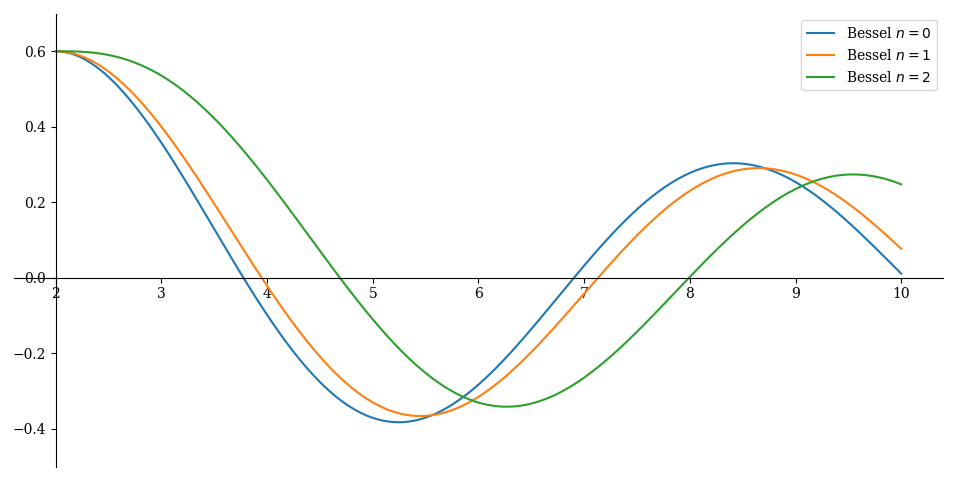

In [59]:
from scipy.linalg import solve_banded

# xsol=nmp.linspace(0,1,11)
# ysol=nmp.linspace(2,3,11)
# A=nmp.array([xsol,ysol])
# print(A)

# El nombre de la función viene de Boundary Problem Linear Ordinary Differential Equation of Second Order
def solveBPLODE2(x0,xN,y0,yN,f,g,u,Npoints=1000):
# --------------------------------------------------
# input:
# x0,xN,y0,yN: puntos y valores de la condición de frontera
# f,g,u: funciones f(x), g(x), u(x)
# Npoints: número de subintervalos en los que se va a partir el intervalo [x0,XN]
# --------------------------------------------------
# definimos el tamaño de paso    
    h=(xN-x0)/Npoints
# Inicializamos arreglos de vector Z y las tres diagonales de la matriz A
    zvec=nmp.zeros(Npoints-1)
    diag=nmp.zeros(Npoints-1)
    diagup=nmp.zeros(Npoints-1)
    diagdown=nmp.zeros(Npoints-1)
# Inicializamos el output
    xsol=nmp.linspace(x0,xN,Npoints+1)
    ysol=nmp.zeros(Npoints+1)
    ysol[0]=y0
    ysol[Npoints]=yN
# Definimos diag y zvec    
    for i in range(Npoints-1):
        diag[i]=-g(xsol[i+1])-2/(h**2)
        zvec[i]=u(xsol[i+1])
    
    zvec[0]=zvec[0]-(h**(-2)+f(x0+h)/(2*h))*y0
    zvec[Npoints-2]=zvec[Npoints-2]-(h**(-2)-f(xN-h)/(2*h))*yN
# Definimos diagup y diagdown
    diagup[0]=0
    diagdown[Npoints-2]=0
    for i in range(Npoints-2):
        diagup[i+1]=h**(-2)-f(x0+h*(i+1))/(2*h)
        diagdown[i]=h**(-2)+f(x0+h*(i+2))/(2*h)
# Generamos la matriz tridiagonal en el formato pedido por solve_banded        
    Am=nmp.array([diagup,diag,diagdown])
# Llamamos a solve_banded
    ysol[1:Npoints]=solve_banded((1,1),Am,zvec)
    return xsol,ysol


# # Definimos f,g,h para la Ec. de Bessel n=0
f=lambda x:-(1/x)
g=lambda x:-1
u=lambda x:0
yN=0.010902282263010385
xsolb,ysolb0=solveBPLODE2(2,10,0.6,yN,f,g,u,2500)


yN=0.07646955311680584
# Cambiamos g para la Ec. de Bessel n=1
g=lambda x:((1/x)**2-1)
xsolb1,ysolb1=solveBPLODE2(2,10,0.6,yN,f,g,u,3500)

yN=0.24743986826407688
# Cambiamos g para la Ec. de Bessel n=2
g=lambda x:((2/x)**2-1)
xsolb,ysolb2=solveBPLODE2(2,10,0.6,yN,f,g,u,2500)

# Graficamos las soluciones
plt.figure(figsize=(12,6),dpi=100)
plt.plot(xsolb,ysolb0)
plt.plot(xsolb1,ysolb1)
plt.plot(xsolb,ysolb2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',2))
plt.legend(['Bessel $n=0$','Bessel $n=1$','Bessel $n=2$'])
plt.ylim(-0.5,0.7)
plt.show()


In [3]:
library(dplyr)

NameError: name 'library' is not defined